**Praditya Irgy**

Tegal, Jawa Tengah

*www.dicoding.com/users/pradityairgy*

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-25 22:05:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.84MB/s    in 50s     

2021-06-25 22:06:23 (6.13 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
import os

base_dir = '/tmp/rockpaperscissors'
os.chdir(base_dir)
print(os.getcwd())

/tmp/rockpaperscissors


In [4]:
os.mkdir('train')
os.mkdir('val')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
import shutil

def split(dir):
  val_path = f'val/{dir}'
  file = os.listdir(dir)
  porsi_val = len(file)*0.4

  os.mkdir(val_path)  
  for i in range(int(porsi_val)):
    shutil.move(f'{dir}/{file[i]}', val_path) 

  shutil.move(dir, 'train')

split('paper')
split('rock')
split('scissors')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.2, 2.0],
    rotation_range=90,
    height_shift_range=0.4,
    width_shift_range=0.4,
    horizontal_flip=True,
    shear_range = 0.2,
    zoom_range=0.4,
    fill_mode = 'nearest'
)
     
test_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.2, 2.0],
    rotation_range=90,
    height_shift_range=0.4,
    width_shift_range=0.4,
    horizontal_flip=True,
    shear_range = 0.2,
    zoom_range=0.4,
    fill_mode = 'nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical')
     
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    #tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    #tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
model.fit(
      train_generator,
      epochs=110,
      steps_per_epoch=42,
      batch_size=8,
      validation_steps=28,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/110
42/42 - 16s - loss: 0.1350 - accuracy: 0.9528 - val_loss: 0.1344 - val_accuracy: 0.9611
Epoch 2/110
42/42 - 16s - loss: 0.1527 - accuracy: 0.9460 - val_loss: 0.1803 - val_accuracy: 0.9325
Epoch 3/110
42/42 - 15s - loss: 0.1635 - accuracy: 0.9467 - val_loss: 0.1215 - val_accuracy: 0.9565
Epoch 4/110
42/42 - 15s - loss: 0.1505 - accuracy: 0.9475 - val_loss: 0.1542 - val_accuracy: 0.9428
Epoch 5/110
42/42 - 15s - loss: 0.1373 - accuracy: 0.9543 - val_loss: 0.1377 - val_accuracy: 0.9634
Epoch 6/110
42/42 - 16s - loss: 0.1432 - accuracy: 0.9559 - val_loss: 0.1472 - val_accuracy: 0.9462
Epoch 7/110
42/42 - 15s - loss: 0.1678 - accuracy: 0.9414 - val_loss: 0.1484 - val_accuracy: 0.9497
Epoch 8/110
42/42 - 16s - loss: 0.1485 - accuracy: 0.9452 - val_loss: 0.1168 - val_accuracy: 0.9634
Epoch 9/110
42/42 - 15s - loss: 0.1478 - accuracy: 0.9444 - val_loss: 0.1254 - val_accuracy: 0.9645
Epoch 10/110
42/42 - 16s - loss: 0.1678 - accuracy: 0.9482 - val_loss: 0.1297 - val_accuracy: 0.9611

Saving paper.jpeg to paper (5).jpeg
paper.jpeg
[[1. 0. 0.]]
paper


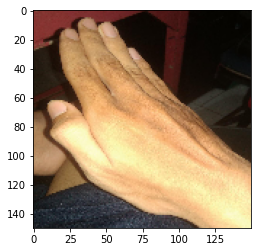

In [25]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
     
    for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(150,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      
      print(fn)
      print(classes)
      if classes[0][0] == 1:
        print('paper')
        
      elif classes[0][1] == 1:
        print('rock')

      else:
        print('scissors')